In [57]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np
import datetime as dt
import math as math

In [2]:
df = pd.read_csv('Домашнее задание Бизнес-4 (исходник).csv', sep=';')

In [3]:
df.head(10)

,id_client,flag_conv
0,1345321,0
1,1345322,0
2,1345330,0
3,1345338,1
4,1345342,0
5,1345351,1
6,1345356,1
7,1345362,0
8,1345367,1
9,1345375,0


In [10]:
df['right_symbol'] = df['id_client'].astype(str).str[-1]

In [11]:
df.head(10)

,id_client,flag_conv,right_symbol
0,1345321,0,1
1,1345322,0,2
2,1345330,0,0
3,1345338,1,8
4,1345342,0,2
5,1345351,1,1
6,1345356,1,6
7,1345362,0,2
8,1345367,1,7
9,1345375,0,5


In [28]:
df_gr = df.groupby('right_symbol').mean()['flag_conv'].reset_index() 
df_gr

,right_symbol,flag_conv
0,0,0.996835
1,1,0.603715
2,2,0.543689
3,3,0.543624
4,4,0.528662
5,5,0.545732
6,6,0.529412
7,7,0.632258
8,8,0.563518
9,9,0.632716


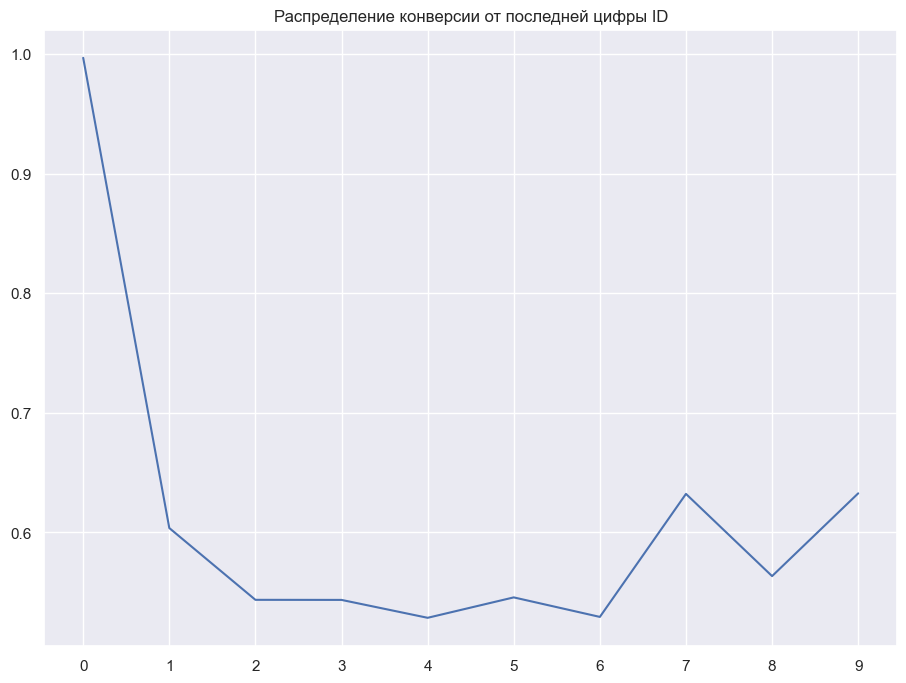

In [30]:
plt.plot(df_gr['right_symbol'], df_gr['flag_conv'])
plt.title('Распределение конверсии от последней цифры ID')
plt.show()

In [ ]:
# Сделайте разбиение клиентов по группам (контроль и тест) в зависимости от остатка деления идентификатора на 10. 
# Рассчитайте результаты АА-теста. Наблюдается ли разница?


In [36]:
df['id_group_rest'] = np.where(df['id_client'] % 10 < 5, 1, 0)
df

,id_client,flag_conv,right_symbol,id_group_rest
0,1345321,0,1,1
1,1345322,0,2,1
2,1345330,0,0,1
3,1345338,1,8,0
4,1345342,0,2,1
...,...,...,...,...
3164,1361073,1,3,1
3165,1361074,1,4,1
3166,1361082,1,2,1
3167,1361083,1,3,1


In [35]:
print('Кол-во ', df.groupby('id_group_rest').count()['id_client'].reset_index())
print('Среднее', df.groupby('id_group_rest').mean()['flag_conv'].reset_index())

Кол-во     id_group_rest  id_client
0              0       1609
1              1       1560
Среднее    id_group_rest  flag_conv
0              0   0.579863
1              1   0.644872


C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\2431650988.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print('Среднее', df.groupby('id_group_rest').mean()['flag_conv'].reset_index())


In [39]:
s, p = ttest_ind(df[df['id_group_rest']==1]['flag_conv'], df[df['id_group_rest']==0]['flag_conv']) 

In [40]:
print(s)
print(p)

3.761500955083385
0.00017195329628373794


In [ ]:
#Вывод разделять пополам <5 с остаток деления на 10 нельзя так получается слшком маленькое pvalue 
# и нулевая гипотеза отвергается



In [ ]:
# Сделайте разбиение клиентов по группам (контроль и тест) в зависимости от четности идентификатора (остатка от 
# деления идентификатора на 2). Рассчитайте результаты АА-теста.  Наблюдается ли разница?


In [45]:
df['id_group_even'] = np.where(df['id_client'] % 2 == 0, 1, 0)
df

,id_client,flag_conv,right_symbol,id_group_rest,id_group_even
0,1345321,0,1,0,0
1,1345322,0,2,1,1
2,1345330,0,0,1,1
3,1345338,1,8,1,1
4,1345342,0,2,1,1
...,...,...,...,...,...
3164,1361073,1,3,0,0
3165,1361074,1,4,1,1
3166,1361082,1,2,1,1
3167,1361083,1,3,0,0


In [46]:
print('Кол-во ', df.groupby('id_group_even').count()['id_client'].reset_index())
print('Среднее', df.groupby('id_group_even').mean()['flag_conv'].reset_index())

Кол-во     id_group_even  id_client
0              0       1583
1              1       1586
Среднее    id_group_even  flag_conv
0              0   0.591914
1              1   0.631778


C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\2076136981.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print('Среднее', df.groupby('id_group_even').mean()['flag_conv'].reset_index())


In [47]:
s, p = ttest_ind(df[df['id_group_even']==1]['flag_conv'], df[df['id_group_rest']==0]['flag_conv']) 

In [48]:
print(s)
print(p)

2.303661902563631
0.021306090686166332


In [51]:
df_aa = pd.DataFrame(columns=['iter','stat_crit','p_value'])

for i in range(1,1000):
    part_50 = df.sample(frac = 0.5)
    rest_part_50 = df.drop(part_50.index)

    s_a, p_a = ttest_ind(part_50['flag_conv'], rest_part_50['flag_conv'])
    
    df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)

C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed fr

C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed fr

C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed fr

C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed fr

C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed fr

C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed fr

C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed fr

C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed fr

C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed fr

C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_aa = df_aa.append({'iter':i,'stat_crit':s_a,'p_value':p_a}, ignore_index = True)
C:\Users\zurik\AppData\Local\Temp\ipykernel_21764\1472323299.py:9: FutureWarning: The frame.append method is deprecated and will be removed fr

In [54]:
ratt = df_aa[df_aa['p_value']<=0.05].count()['iter']/df_aa.count()['iter']
ratt

0.04804804804804805

In [58]:
z =(ratt - 0.05)/math.sqrt(ratt*(1-ratt)/100)

In [60]:
print(z)
print(abs(z)<=1.96)

-0.09126909289903135
True


In [61]:
m = df['flag_conv'].mean()
sigma = m*(1-m)
print(m)
print(sigma)

0.6118649416219628
0.23748623483591486


In [63]:
n = 16 * sigma**2/ (0.02**2)
print(n)

2255.988469461572
